Tarefa: criar uma funcao que recebe conj1 e conj2 (de preferencia via loc 
em um mesmo df) e sinaliza de alguma forma potenciais duplicatas de conj1 em
conj2.

In [1]:
import pandas as pd
import os
import numpy as np
import pickle
import shutil

from ivpy import attach,show,montage,histogram,scatter,compose
from ivpy.extract import extract
from ivpy.reduce import pca,tsne,umap
from ivpy.cluster import cluster
from ivpy.extract import norm
from sklearn.metrics import adjusted_rand_score as adjrand
from annoy import AnnoyIndex
from ivpy.data import _typecheck,_pathfilter,_featfilter,seq_types
from ivpy.plot import show
from PIL import Image

2021-12-02 10:25:37.278927: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-12-02 10:25:37.278964: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
metadata = pd.read_csv("/mnt/e/Tasks/similarity/files/metadata.csv")
feature_matrix = pd.read_pickle("/mnt/e/Tasks/similarity/files/situated_views_features_gray.pickle")
df = pd.read_pickle("/mnt/e/Tasks/similarity/files/situated_views_df_gray.pickle")

#open files

In [3]:
df['geolocated'] = df["id"].apply(lambda x: int(1) if x.endswith("_geo") else 0 )
not_geo = df[df["geolocated"]==0]
geo = df[df["geolocated"]==1]
attach(df, "filename")


#FUNCTION

In [4]:
def find_duplicates(X, set_img,threshold,find="All"):    
    if not find == "All":        
        X = X.iloc[set_img.index]         

    t = AnnoyIndex(X.shape[1])
    counter = -1
    for j in X.index:
        counter+=1
        t.add_item(counter,list(X.loc[j]))
   
    idmap = dict(zip(X.index,list(range(len(X)))))    
    idmapReverse = dict(zip(list(range(len(X))),X.index))    

    t.build(10) # 10 trees
    items = [] 
       
    for image in set_img.index:
        nns, distances = t.get_nns_by_item(idmap[image],200,include_distances=True)
        nns_dict = dict(zip(nns, distances))        
        nnsAnnoy = {idmapReverse[item]:nns_dict[item] for item in nns_dict}
        selected_nn= [item for item in nnsAnnoy if nnsAnnoy[item] <threshold]        
        Selected_ids = [df.iloc[item].id for item in selected_nn]
        if len(selected_nn) > 1:                      
            items.append([Selected_ids[0], Selected_ids[1:],selected_nn])
    return items

def by_identifier(identifier):
    for i,item in enumerate(duplicates):
        if item[0] == identifier:     
            return i
        else:
            pass
    return None

In [5]:
#duplicates_not_geo = find_duplicates(feature_matrix, not_geo, 0.75, "All")
# duplicates_geo_by_geo = find_duplicates(feature_matrix, geo, 0.60,"it self")
# duplicates_geo = find_duplicates(feature_matrix, geo, 0.60,"All")
duplicates_all= find_duplicates(feature_matrix, df, 0.75,"All")

/tmp/ipykernel_502/3702894225.py:5: FutureWarning: The default argument for metric will be removed in future version of Annoy. Please pass metric='angular' explicitly.
  t = AnnoyIndex(X.shape[1])


In [6]:
len(duplicates_all)

3814

image: 001MC001006 Duplicates: 001RR004006 OR 001BO001006 OR 0072430cx027-01_geo OR 0072430cx056a-07_geo OR 001RR004005 OR 0072430cx056a-09_geo OR 0072430cx027-06_geo OR 001AN02001001 OR 0072430cx056a-02_geo OR 0071824cx065-02_geo OR 0073040cx002-04 OR 0072430cx043-03_geo OR 037SL03102_geo OR 0071824cx065-03_geo OR P002SAm52-0018 OR 0072430cx056a-04_geo OR 001ALA011002_geo OR 001MC001007 OR 0071824cx065-12_geo OR 001BO001007 OR 0072430cx056a-01_geo OR 0072430cx056a-12_geo OR 007A5P4F01-036_geo OR 0074050cx003e004a-03_geo OR 0072430cx043-02_geo OR 002087BF045 OR 007_IMG_3841_geo OR 002087BF003 OR 002095RJ001033_geo OR 0072430cx056a-10_geo OR 001RJ007003_geo


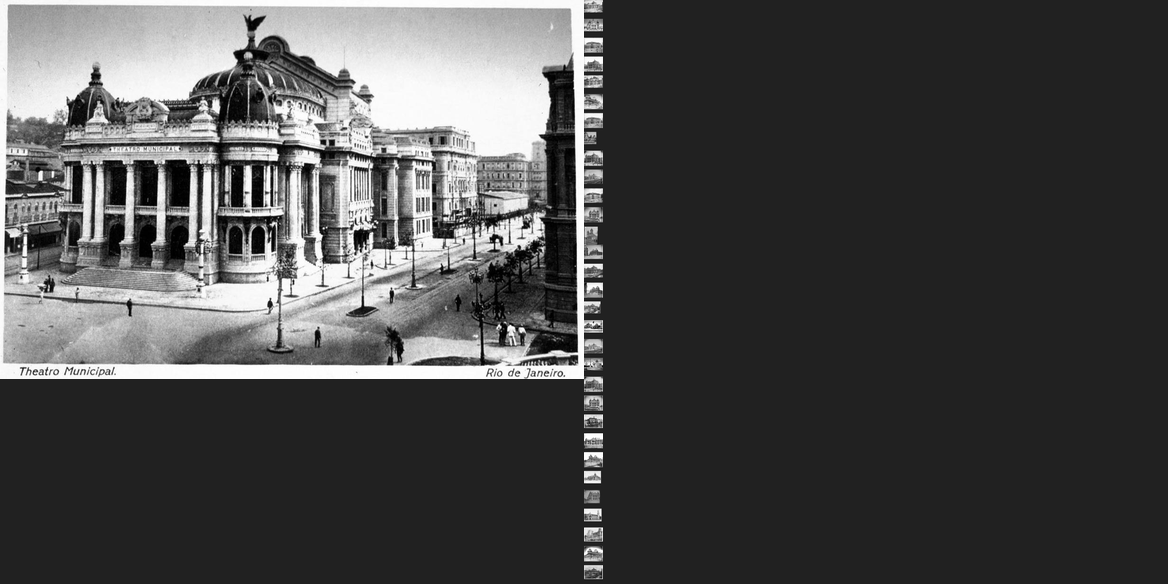

In [30]:
duplicates = duplicates_all
identifier = "001MC001006"
by_order = 0


index = by_identifier(identifier) if by_identifier(identifier) else by_order
print("image:",duplicates[index][0], "Duplicates:", " OR ".join(duplicates[index][1]))
compose(show(duplicates[index][2][0], thumb=900, idx=True),show(df["filename"].loc[duplicates[index][2][1:]],thumb=900, idx=True,notecol=df["id"].loc[duplicates[index][2][1:]]))

In [8]:
path_from = "/mnt/e/Tasks/Vistas Situadas - Imagens/images_cropped/"
path_to = "/mnt/e/Tasks/Vistas Situadas - Imagens/images_cropped/duplicates_geo/"

for i in duplicates_geo:
  img = i[0]
  duplicates = i[1]   
  shutil.copyfile(path_from+img+".jpg","{0}/{1}.jpg".format(path_to, img))  
  for dup in duplicates:
    shutil.copyfile(path_from+img+".jpg","{0}/{1}.jpg".format(path_to, dup))    


NameError: name 'duplicates_geo' is not defined